In [1]:
import os

dir = os.getcwd()
print(dir)

C:\Users\이나라pc\supercoding\1stProject


In [3]:
import os
import zipfile
import pandas as pd
import numpy as np

# 상위 폴더에 있는 zip 파일 경로
zip_path = os.path.join('C:/Users/이나라pc/supercoding', "Imdb.zip")  

with zipfile.ZipFile(zip_path) as z:

    with z.open("imdb_top_1000.csv") as f:
        df = pd.read_csv(f)


In [19]:
# 연대별로 데이터 인덱싱
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors ='coerce')
filtered_df = df[df['Released_Year'] > 0]
filtered_df['Decade'] = (filtered_df['Released_Year'] // 10 * 10).astype(int)

# 장르별로 데이터 인덱싱
filtered_df = (
    filtered_df
    .assign(Genre=lambda x: x["Genre"].str.split(r",\s*"))
    .explode("Genre")
    .drop_duplicates(["Series_Title", "Released_Year", "Genre"])
)

D:\cpp_temp\ipykernel_22056\163104698.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Decade'] = (filtered_df['Released_Year'] // 10 * 10).astype(int)


In [20]:
n_by_decade = filtered_df.groupby('Decade')['Series_Title'].nunique().reset_index(name='n_movies')
print('연도별 영화 수 \n',n_by_decade)
decade_cnt = (filtered_df.groupby(['Decade','Genre'])['Series_Title'].nunique().reset_index(name ='Count' )).sort_values(['Decade','Count'], ascending=[True, False])
decade_cnt['share'] = decade_cnt['Count'] / decade_cnt.groupby('Decade')['Count'].transform('sum')

decade_tops = decade_cnt.groupby('Decade').head(5)
decade_tops

연도별 영화 수 
     Decade  n_movies
0     1920        11
1     1930        24
2     1940        35
3     1950        56
4     1960        73
5     1970        76
6     1980        89
7     1990       150
8     2000       237
9     2010       241
10    2020         6


,Decade,Genre,Count,share
4,1920,Drama,6,0.206897
3,1920,Comedy,5,0.172414
10,1920,Romance,3,0.103448
0,1920,Action,2,0.068966
1,1920,Adventure,2,0.068966
17,1930,Drama,12,0.187500
15,1930,Comedy,9,0.140625
21,1930,Horror,5,0.078125
25,1930,Romance,5,0.078125
14,1930,Adventure,4,0.062500


D:\cpp_temp\ipykernel_22056\3235825363.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=n_by_decade, x='Decade', y='n_movies' , palette = 'Set3')


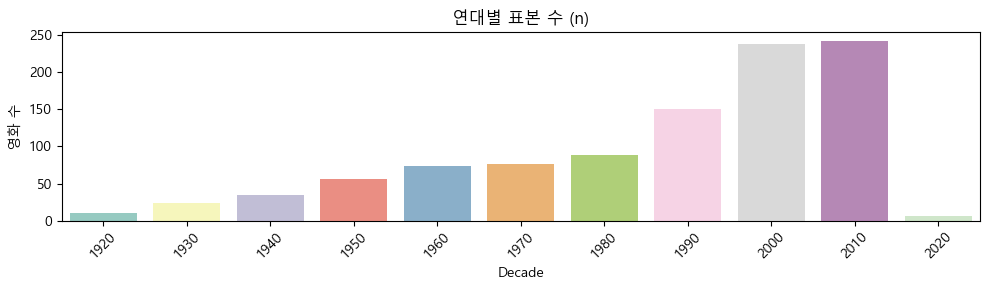

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,3))
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False 

sns.barplot(data=n_by_decade, x='Decade', y='n_movies' , palette = 'Set3')
plt.title('연대별 표본 수 (n)')
plt.xlabel('Decade')
plt.ylabel('영화 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


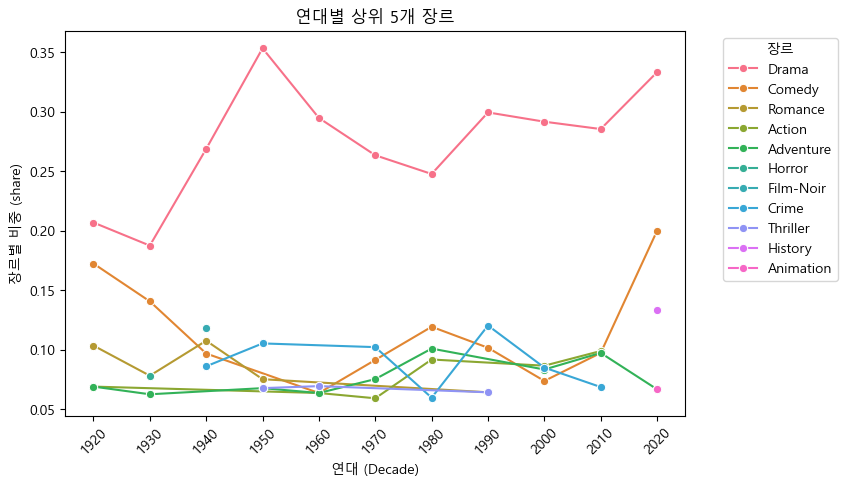

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False 

plt.figure(figsize=(8, 5))
ax = sns.lineplot(
    data=decade_tops,
    x='Decade',
    y='share',
    hue='Genre',    
    marker='o',

)

decades = np.sort(decade_tops['Decade'].astype('int64').unique())
ax.set_xticks(decades)
ax.set_xticklabels([str(d) for d in decades], rotation=45)


plt.title('연대별 상위 5개 장르')
plt.xlabel('연대 (Decade)')
plt.ylabel('장르별 비중 (share)')
plt.legend(title='장르', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### 모든 연대에서 드라마가 최상위 장르 - 표본수가 큰 영향 있을 것으로 보임

In [24]:
#드라마 장르 제외 주요 장르 파악
top_no_drama  = (filtered_df[filtered_df['Genre'] != 'Drama'].groupby(['Decade','Genre'])['Series_Title'].nunique().reset_index(name ='Count' )).sort_values(['Decade','Count'], ascending=[True, False])
top_no_drama ['share'] = top_no_drama['Count'] / decade_cnt.groupby('Decade')['Count'].transform('sum')
top_no_drama = top_no_drama.groupby('Decade').head(5)

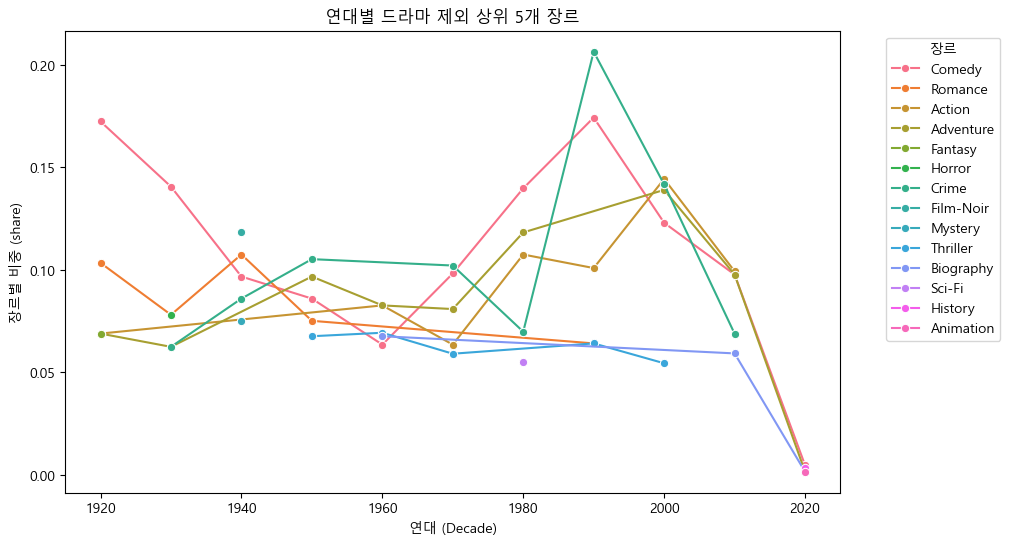

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'


plt.figure(figsize=(10, 6))
sns.lineplot(
    data=top_no_drama,
    x='Decade',
    y='share',
    hue='Genre',    
    marker='o',

)

plt.title('연대별 드라마 제외 상위 5개 장르')
plt.xlabel('연대 (Decade)')
plt.ylabel('장르별 비중 (share)')
plt.legend(title='장르', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [30]:
# t시청자 평점 상위 장르 및 평점 편차 파악해보기
x = filtered_df.copy()
viewers_score = (x.groupby('Decade', as_index = False)
                        .agg(mean_user_rating = ('IMDB_Rating', 'mean'),
                              std_critic=('IMDB_Rating','std'),
                             n_movies=('Series_Title','nunique'))
                        .sort_values('Decade', ascending=True))

viewers_score

,Decade,mean_user_rating,std_critic,n_movies
0,1920,8.131034,0.110529,11
1,1930,7.967187,0.230978,24
2,1940,8.025806,0.223560,35
3,1950,8.054887,0.253002,56
4,1960,7.956069,0.247618,73
5,1970,7.946774,0.298673,76
6,1980,7.957798,0.261789,89
7,1990,7.958021,0.318555,150
8,2000,7.900160,0.268908,237
9,2010,7.925437,0.250391,241


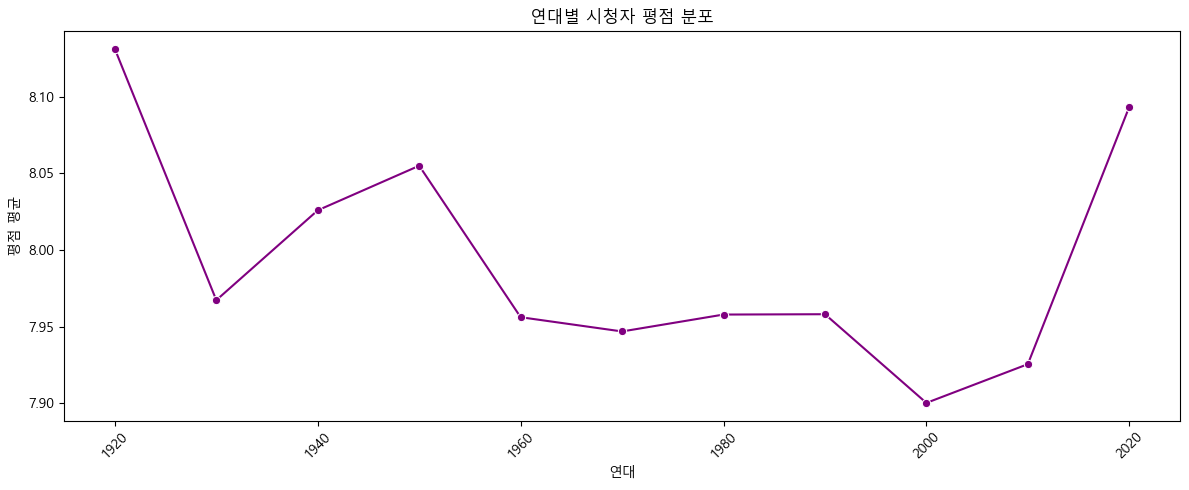

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_df = viewers_score.dropna(subset=['Decade','mean_user_rating']).copy()
plot_df['Decade'] = plot_df['Decade'].astype(int)

plt.figure(figsize=(12,5))
ax = sns.lineplot(data=plot_df, x='Decade', y='mean_user_rating', marker='o', color = 'purple')


plt.title('연대별 시청자 평점 분포')
# plt.grid()

plt.xlabel('연대')
plt.ylabel('평점 평균')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
x = filtered_df.copy()

# 평론가 평점 상위 장르, 평점 편차 파악
critics_score = (x.groupby('Decade', as_index = False)
                        .agg(mean_critic_score = ('Meta_score', 'mean'),
                             std_critic=('Meta_score','std'),
                             meadian_votes = ('No_of_Votes', 'median'),
                             n_movies=('Series_Title','nunique'))
                         .sort_values('Decade', ascending= True))

critics_score 

,Decade,mean_critic_score,std_critic,meadian_votes,n_movies
0,1920,95.285714,3.638419,57428.0,11
1,1930,91.333333,5.733055,55163.0,24
2,1940,92.480769,7.198830,59556.0,35
3,1950,90.910000,7.607937,81702.0,56
4,1960,82.492857,10.882298,69458.0,73
5,1970,80.521472,11.015891,93809.5,76
6,1980,76.797030,11.560070,173936.5,89
7,1990,73.945455,12.086695,171640.0,150
8,2000,73.737968,12.632899,243729.0,237
9,2010,77.000000,10.463401,246644.0,241


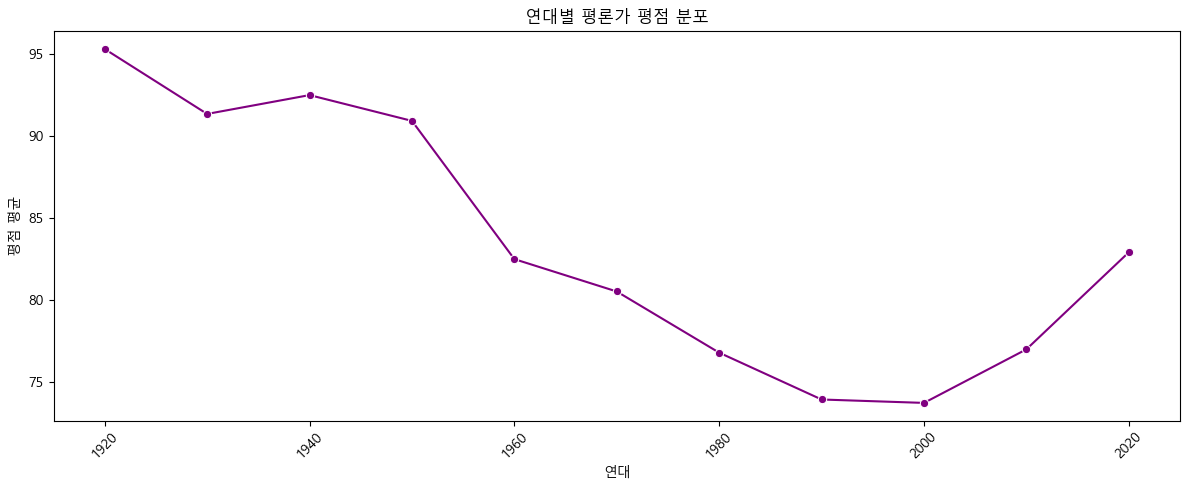

In [29]:
# 평론가 평점 상위 장르 파악

import seaborn as sns
import matplotlib.pyplot as plt

plot_df_2 = critics_score.dropna(subset=['Decade','mean_critic_score']).copy()
plot_df_2['Decade'] = plot_df_2['Decade'].astype(int)

plt.figure(figsize=(12,5))
ax = sns.lineplot(data=plot_df_2, x='Decade', y='mean_critic_score', marker='o', color = 'purple')


plt.title('연대별 평론가 평점 분포')
# plt.grid()

plt.xlabel('연대')
plt.ylabel('평점 평균')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 영화 수 및 기술 발전과 별개로 연대별 영화의 질/ 두 그룹의 작품 평가는 하향세를 보임 

D:\cpp_temp\ipykernel_22056\721471226.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


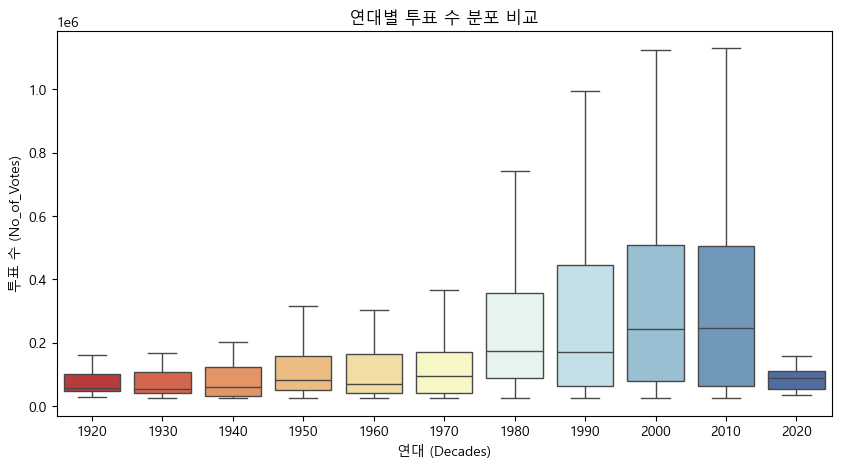

In [32]:
plt.figure(figsize=(10, 5))

sns.boxplot(
    x='Decade',           # 연대를 x축으로 그룹화
    y='No_of_Votes',       # 투표수를 y축으로 지정
    data= filtered_df,
    showfliers=False,       # 이상치(Outliers)는 제외하고 박스플롯 그리기 
    palette = 'RdYlBu'
)

plt.title('연대별 투표 수 분포 비교')
plt.xlabel('연대 (Decades)')
plt.ylabel('투표 수 (No_of_Votes)')
plt.show()

### 연대별로 화제성 차이가 큰편으로, 화제성은 시간의 흐름에 따라 점차 증가하는 경향성 20년대 이후 그래프는 표본수 미달로 참조한계 보임

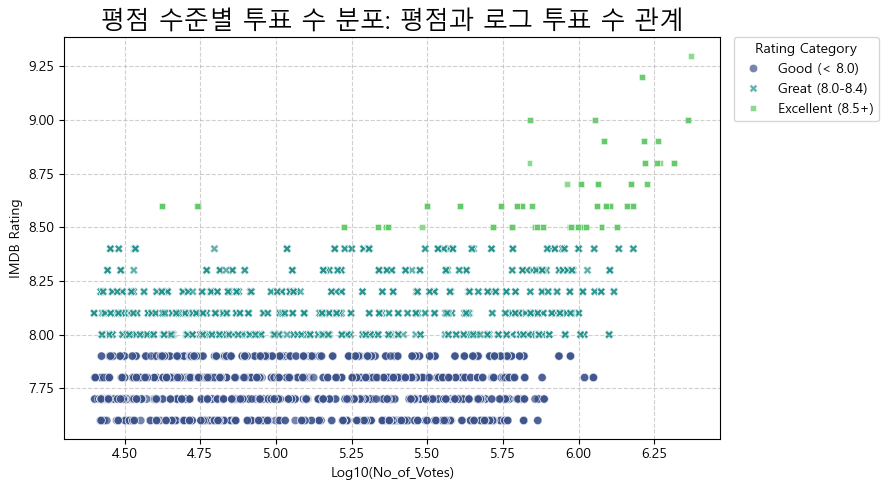

In [36]:
# 영화 평점과 화제성의 상관관계 파악
votes_df = filtered_df.copy()
votes_df['No_of_Votes'] = pd.to_numeric(votes_df['No_of_Votes'], errors='coerce')
votes_df['IMDB_Rating'] = pd.to_numeric(votes_df['IMDB_Rating'], errors='coerce')
votes_df = votes_df.dropna(subset=['Decade','No_of_Votes','IMDB_Rating'])

votes_df['log_votes'] = np.log10(votes_df['No_of_Votes'] + 1)


plt.figure(figsize = (9,5))

bins = [0, 8.0, 8.5, 10.0]
labels = ['Good (< 8.0)', 'Great (8.0-8.4)', 'Excellent (8.5+)']

votes_df['Rating_Category'] = pd.cut(
    votes_df['IMDB_Rating'], 
    bins=bins, 
    labels=labels, 
    right=False # 8.0 미만은 Good에, 8.0 이상은 Great에 포함되도록 설정
)

sns.scatterplot(
    data=votes_df,
    x='log_votes',                  # 가로축: 로그 투표 수
    y='IMDB_Rating',                # 세로축: 평점 (원본값 유지)
    hue='Rating_Category',          # 색상: 평점 범주별로 다르게 인코딩
    palette="viridis",              # 대비가 명확한 팔레트 사용
    style='Rating_Category',        # 마커 모양도 범주별로 다르게 설정
    alpha=0.7
)

plt.title('평점 수준별 투표 수 분포: 평점과 로그 투표 수 관계', fontsize=18)
plt.xlabel('Log10(No_of_Votes)')
plt.ylabel('IMDB Rating')

# 범례 위치 조정
plt.legend(
    title='Rating Category', 
    bbox_to_anchor=(1.02, 1), 
    loc='upper left', 
    borderaxespad=0.
)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 화제성 높은 영화 -> 대체로 평점 높다는 공식이 연대와 상관없이 동일한지 파악

In [37]:
# 연대별(Decades) 평점과 로그 투표 수 간의 상관계수 계산
correlation_by_decade = (
    votes_df
    .groupby('Decade')
    [['IMDB_Rating', 'log_votes']]
    .corr(method='spearman')
    .unstack()
)

# 평점과 로그 투표 수 간의 상관계수만 선택
correlation_results = correlation_by_decade['IMDB_Rating']['log_votes']

print("--- 연대별 평점-로그투표수 스피어만 상관계수 ---")
print(correlation_results)

correlation_results = correlation_by_decade['IMDB_Rating']['log_votes']
n_by_decade = votes_df.groupby('Decade')['Series_Title'].nunique()

out = pd.concat([correlation_results.rename('spearman'), n_by_decade.rename('n')], axis=1)
print(out.sort_index())

--- 연대별 평점-로그투표수 스피어만 상관계수 ---
Decade
1920    0.402928
1930    0.508866
1940    0.539270
1950    0.634875
1960    0.248912
1970    0.442138
1980    0.423066
1990    0.422581
2000    0.261849
2010    0.075642
2020    0.056349
Name: log_votes, dtype: float64
        spearman    n
Decade               
1920    0.402928   11
1930    0.508866   24
1940    0.539270   35
1950    0.634875   56
1960    0.248912   73
1970    0.442138   76
1980    0.423066   89
1990    0.422581  150
2000    0.261849  237
2010    0.075642  241
2020    0.056349    6


D:\cpp_temp\ipykernel_22056\3880400632.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


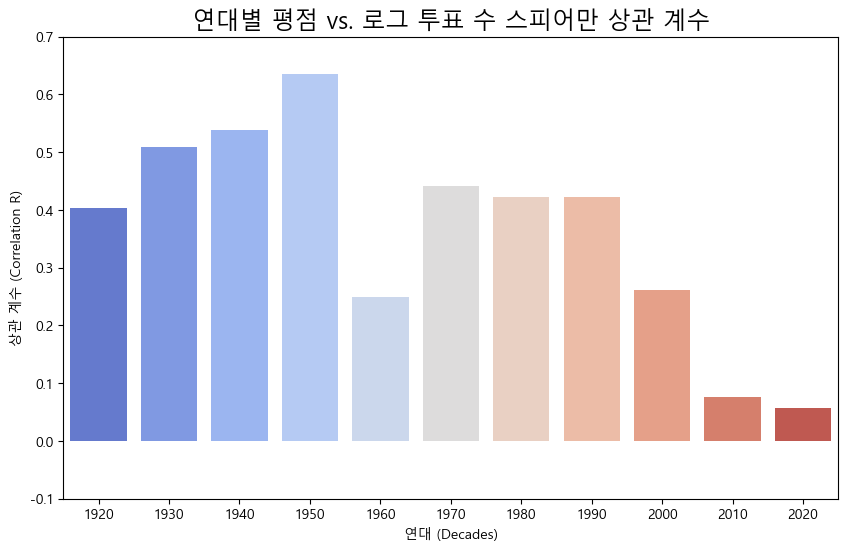

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False 

plt.figure(figsize=(10, 6))


sns.barplot(
    x=correlation_results.index,  # 연대 (Decades)
    y=correlation_results.values, # 상관 계수 값
    palette='coolwarm'
)

# plt.axhline(0, color='grey', linestyle='--') # 0 기준선 표시
plt.title('연대별 평점 vs. 로그 투표 수 스피어만 상관 계수', size = 17)
plt.xlabel('연대 (Decades)')
plt.ylabel('상관 계수 (Correlation R)')
plt.ylim(-0.1, 0.7) # 축 범위를 조정하여 데이터가 잘 보이도록 설정
plt.show()

### 시대가 흐름에 따라 화제성과 평점의 상관관계가 해체되고 있음 많이 본 영화가 꼭 평점이 높지는 않음